My Portfolio Project - Draft Version 01, 1/19/21
# Heart Failure Clinical Records Data- Predicting Mortality Caused By Heart Failure?
# Data Visualization and EDA 
## Kadriye Tuba Turkcan Karaca

### **Table of Contents** <a class="anchor" id="0.1"></a>

- [Goal of the Project](#mygoal)
- [Data Set](#mydata)
- [Import All Packs](#mypacks)
- [Import Data](#import)
- [Describing the Data and Univariate Analysis](#univariate)
    - [Describe the data with 6 codes](#6codes)
    - [Missing](#missing)
    - [Univariate Plots](#uniplot)
- [Looking for Bivariate Relations](#bivariate)
- [Looking for Multivarite Relations](#multivariate)
- [Interactive Plots](#interactive)
- [Comments and Summary on EDA Exploration](#exp)
- [References](#ref)

## Goal of the Project <a class="anchor" id="mygoal"></a>

"Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs. "
This dataset contains 12 features such as smoking, diabetes, sex that affect heart failure. Analysis of mortality by heart failure will be done according to these features. This way, CVDs  can be prevented by addressing these factors such as tobacco use.  

## Data Set<a id="mydata"></a>

- The dataset can be found in https://www.kaggle.com/andrewmvd/heart-failure-clinical-data .

- 13 columns (ID, DEATH_EVENT, and all the features), 299 rows. 

- Target variable here is "DEATH_EVENT" column that is going to be predicted. It is 1 for death and 0 for survival.  

- Data file: heart_failure_clinical_records_dataset.csv - the training set including the target in the last column, DEATH_EVENT.

## Import All Packs <a id="mypacks"></a>

In [110]:
# All the packs I will use in the project
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import pandas_profiling as pdp
import plotly.express as px

## Import Data <a id="import"></a>

In [98]:
# import data

df_heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv") 
df_heart_failure.shape

(299, 13)

* There are 299 rows and 13 columns.

In [96]:
df_heart_failure.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [100]:
report = pdp.ProfileReport(df_heart_failure)
report.to_file("report_heart_failure.html")
report

## Describing the Data and Univariate Analysis <a id="univariate"></a>

Features: 
- age 
- anemia => 0: No, 1: Yes
- creatinine_phosphokinase
- diabetes =>  0: No , 1: Yes
- ejection_fraction
- high_blood_pressure => 0: No 1:Yes
- platelets
- serum_creatinine
- serum_sodium
- sex => Male: 1, Female: 0
- smoking => 0: No 1: Yes
- time

### Describe Data with 6 Codes <a id="6codes"></a>

In [7]:
df_heart_failure.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


* None of the columns have null values. Data types used are integers and floating point numbers. 

In [9]:
df_heart_failure.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

* Some of the integer values are categorical such as sex or smoking

In [10]:
df_heart_failure.head(10) #first 10 observation 

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

* anaemia, diabetes, high_blood_pressure, sex are categorical variables. 
* DEATH_EVENT is the target variable and 1 gives the mortality. 
* No survival in the first 10 

In [12]:
df_heart_failure.tail(10) #last 10 observation

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
289  90.0        1                       337         0                 38   
290  45.0        0                       615         1                 55   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
289                    0   390000.0               0.9           144    0   
290                    0   222000.0               0.8           141    0   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
289        0   256            0  
290        0   257            0  
291        0   258            0  
292        1   258            0  
293        1   270            0  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

* No death in the last 10. 

In [13]:
df_heart_failure.describe() #show only numerical summaries

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

* The average age in the dataset is about 60, where the youngest person is 40 and the oldest is 95. 

In [14]:
df_heart_failure.describe(include='all') #include all variables including numerical and categorical

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

* Since all the categoricals ar described as 0's and 1's, that didn't make any difference.

In [16]:
df_heart_failure.dtypes.unique() # returns an numpy array of dtypes

array([dtype('float64'), dtype('int64')], dtype=object)

In [20]:
df_heart_failure.dtypes[df_heart_failure.dtypes =='int64'].index

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [56]:
list(df_heart_failure.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [62]:
#Let's put the categoricals in another frame
#df_categoricals = df_heart_failure[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
#df_categoricals.shape
categoricals = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_heart_failure[categoricals]
df_categoricals = df_heart_failure[categoricals]
df_categoricals

anaemia  diabetes  high_blood_pressure  sex  smoking  DEATH_EVENT
0          0         0                    1    1        0            1
1          0         0                    0    1        0            1
2          0         0                    0    1        1            1
3          1         0                    0    1        0            1
4          1         1                    0    0        0            1
..       ...       ...                  ...  ...      ...          ...
294        0         1                    1    1        1            0
295        0         0                    0    0        0            0
296        0         1                    0    0        0            0
297        0         0                    0    1        1            0
298        0         0                    0    1        1            0

[299 rows x 6 columns]

In [59]:
numericals = [i for i in list(df_heart_failure.columns) if i not in  categoricals]
numericals

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [61]:
df_heart_failure[numericals]
df_numericals = df_heart_failure[numericals]
df_numericals

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  time  
0                 1.9           130     4  
1                 1.1           136     6  
2                 1.3           129     7  
3                 1.9           137     7  
4                 2.7           116     8  
..                ...           ...   ...  
294               1.1           143   270  
295               1.2           139   271  
296               0.8           138   278  
297               1.4           140   280  
298               1.6           136   285  

[299 rows x 7 columns]

In [63]:
#we can describe numericals now
df_numericals.describe()

age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium        time  
count         299.00000    299.000000  299.000000  
mean            1.39388    136.625418  130.260870  
std             1.03451      4.412477   77.614208  
min             0.50000    113.000000    4.000000  
25%             0.90000    134.000000   73.000000  
50%             1.10000    137.000000  115.000000  
75%             1.40000    140.000000  203.000000  
max             9.40000    148.000000  285.000000

### Missingness Check <a id="missing"></a>

In [67]:
# missing data pack
import missingno as msno
%matplotlib inline

<AxesSubplot:>

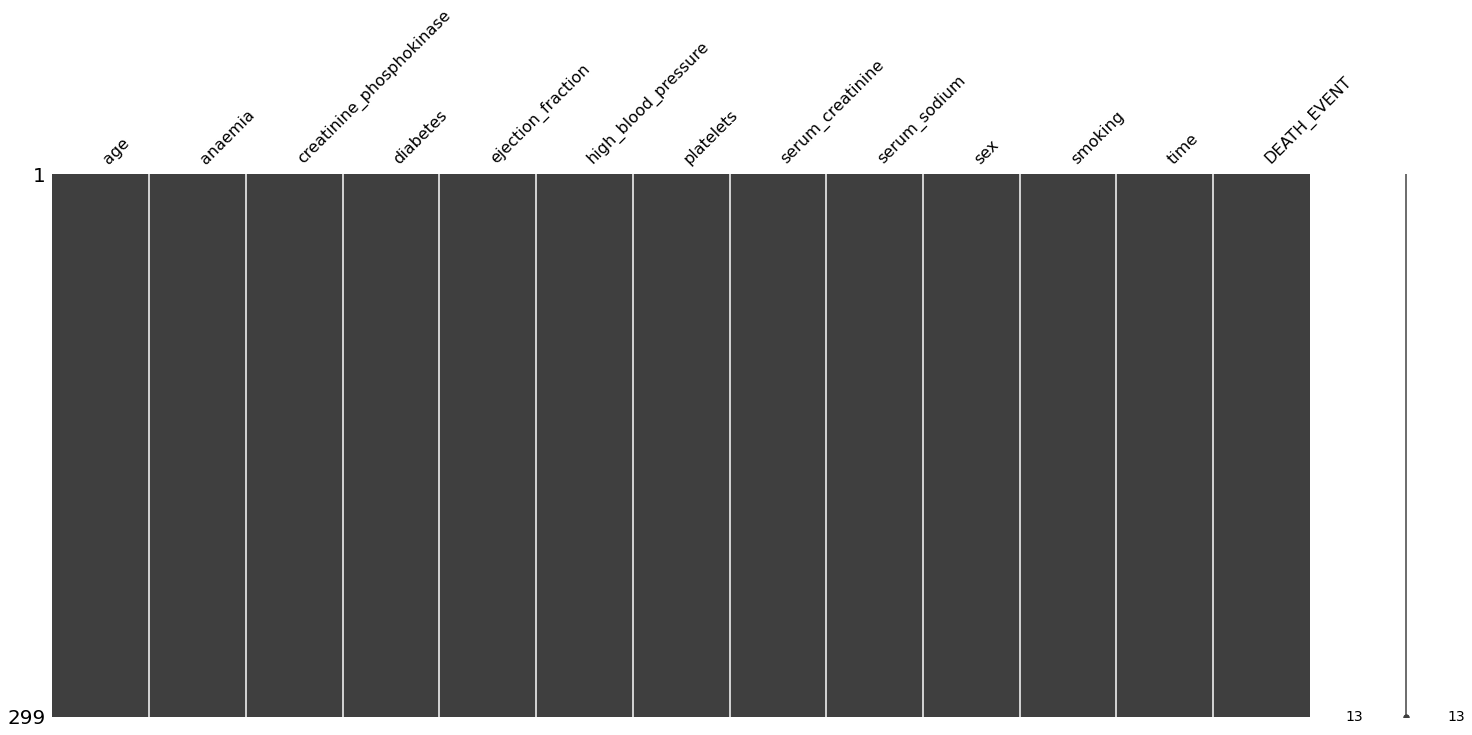

In [68]:
msno.matrix(df_heart_failure)

<AxesSubplot:>

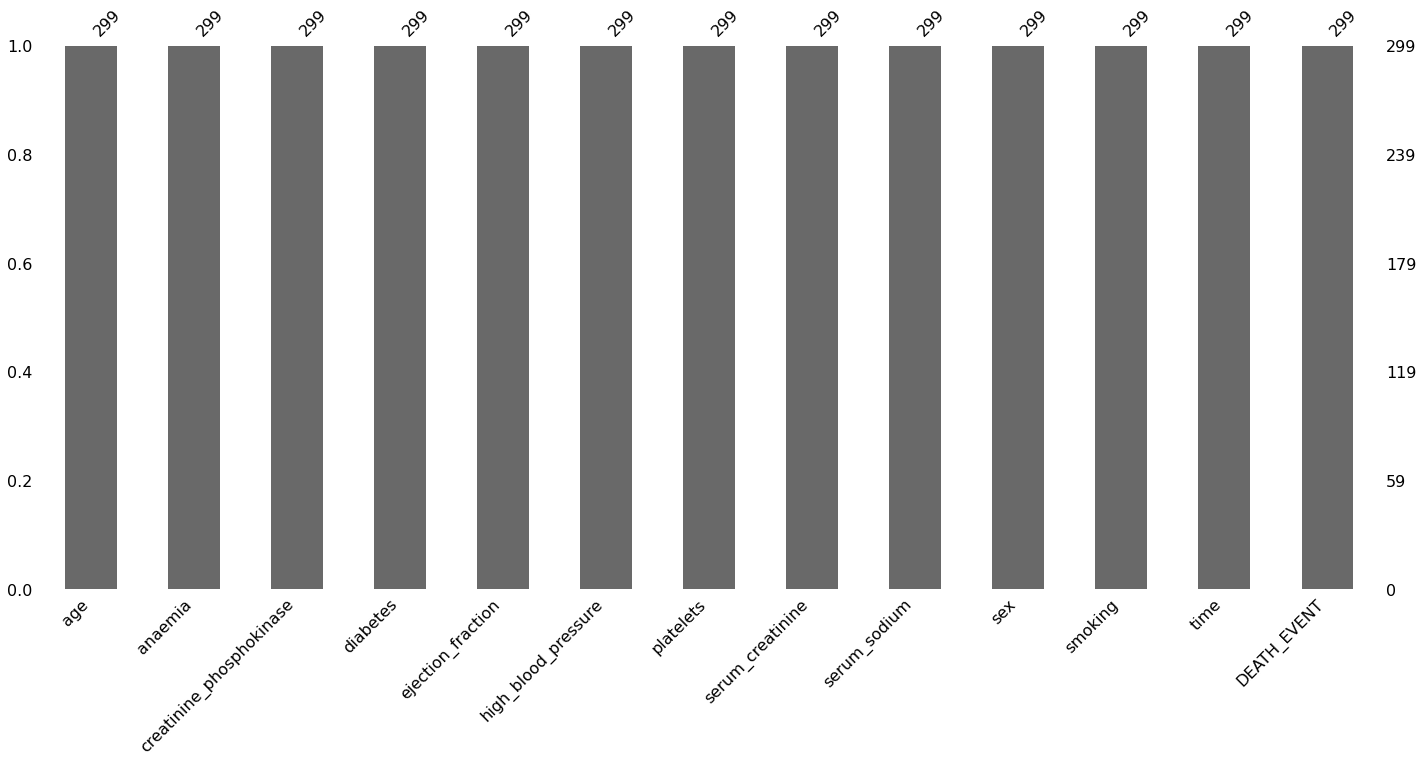

In [69]:
# nullity by column:
msno.bar(df_heart_failure)

In [74]:
df_heart_failure.isnull().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Univariate Plots <a id="uniplot"></a>

* No null values in the dataset

In [75]:
df_heart_failure['DEATH_EVENT'].unique()

array([1, 0])

In [76]:
#number of deaths
np.sum(df_heart_failure['DEATH_EVENT']== 1)

96

In [77]:
#number of alives
np.sum(df_heart_failure['DEATH_EVENT']== 0)

203

In [78]:
#nb of all people in the dataset
df_heart_failure.shape[0]

299

In [84]:
#Death rate
death_rate = np.sum(df_heart_failure['DEATH_EVENT']== 1)/df_heart_failure.shape[0]
print('{:.4f}'.format(death_rate))

0.3211


In [85]:
#Survival Rate
survival_rate = np.sum(df_heart_failure['DEATH_EVENT']== 0)/df_heart_failure.shape[0]
print('{:.4f}'.format(survival_rate))

0.6789


In [89]:
# range values of each (numerical) columns

for i in df_numericals.columns:
    print(i)
    print('Min:', df_numericals[i].min())
    print('Max:', df_numericals[i].max())
    print('Range:', df_numericals[i].max()-df_numericals[i].min())
    print('Std: {:.4f}'.format(df_numericals[i].std()))
    print('Mean: {:.4f}'.format(df_numericals[i].mean()))
    print('*****')

age
Min: 40.0
Max: 95.0
Range: 55.0
Std: 11.8948
Mean: 60.8339
*****
creatinine_phosphokinase
Min: 23
Max: 7861
Range: 7838
Std: 970.2879
Mean: 581.8395
*****
ejection_fraction
Min: 14
Max: 80
Range: 66
Std: 11.8348
Mean: 38.0836
*****
platelets
Min: 25100.0
Max: 850000.0
Range: 824900.0
Std: 97804.2369
Mean: 263358.0293
*****
serum_creatinine
Min: 0.5
Max: 9.4
Range: 8.9
Std: 1.0345
Mean: 1.3939
*****
serum_sodium
Min: 113
Max: 148
Range: 35
Std: 4.4125
Mean: 136.6254
*****
time
Min: 4
Max: 285
Range: 281
Std: 77.6142
Mean: 130.2609
*****


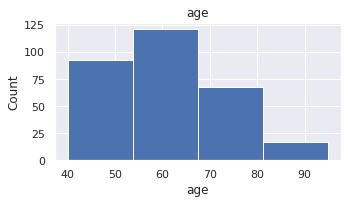

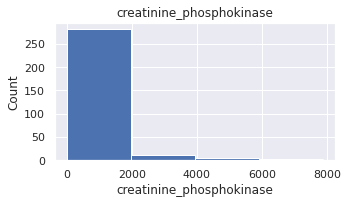

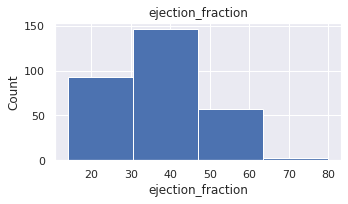

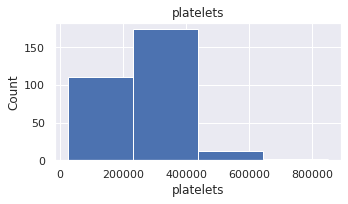

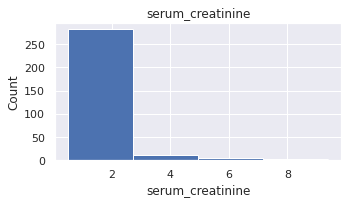

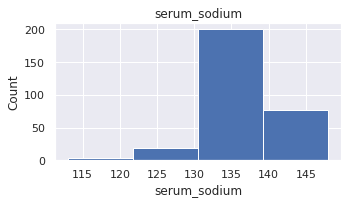

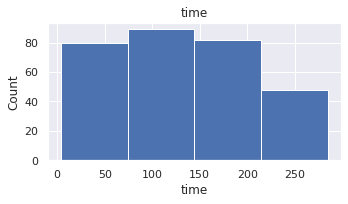

In [91]:

for col in df_numericals.columns:
    sns.set()
    plt.figure(figsize=(5, 3)) 
    plt.hist(df_numericals[col], bins=4)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.tight_layout()
    plt.show()

#### Effect of Age <a id="uniplot"></a>

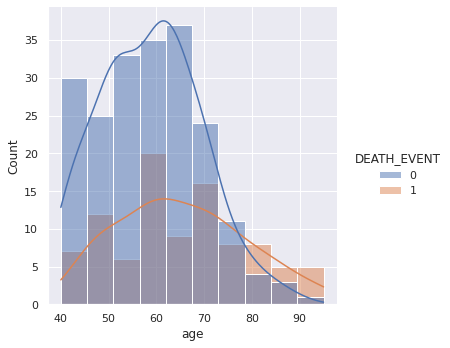

In [128]:
#Distribution of age
sns.displot(data=df_heart_failure, 
            x="age",
            kde=True, hue = 'DEATH_EVENT') 


* Age from 40 to 80, the distribution is high. People with age more than 80 is very low. 

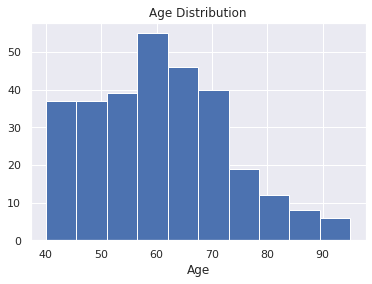

In [127]:
plt.hist(df_heart_failure['age']) #try , density=True
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

#### Effect of Gender <a id="uniplot"></a>

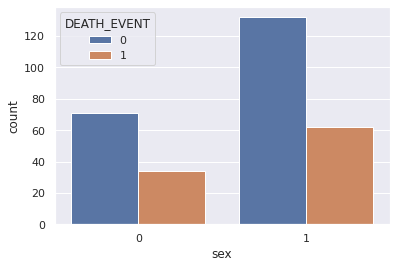

In [147]:
sns.countplot(x='sex', data=df_heart_failure,hue = 'DEATH_EVENT')
plt.show()

#### Effect of Anaemia <a id="uniplot"></a>

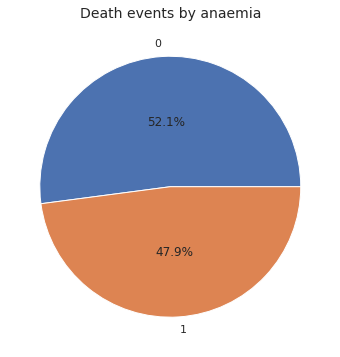

In [145]:
data = df_heart_failure.groupby("anaemia")["DEATH_EVENT"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Death events by anaemia", fontsize=14);
plt.show()

#### Effect of Diabetes <a id="uniplot"></a>

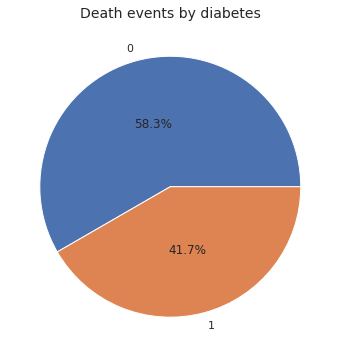

In [149]:
data = df_heart_failure.groupby("diabetes")["DEATH_EVENT"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Death events by diabetes", fontsize=14);
plt.show()

#### Effect of High Blood Pressure <a id="uniplot"></a>

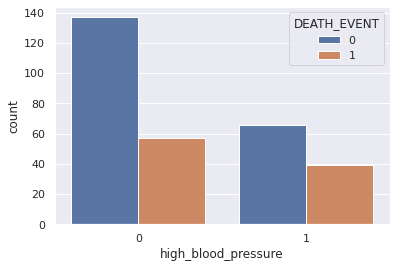

In [152]:
sns.countplot(x='high_blood_pressure', data=df_heart_failure,hue = 'DEATH_EVENT')
plt.show()

#### Effect of Ejection Fraction <a id="uniplot"></a>

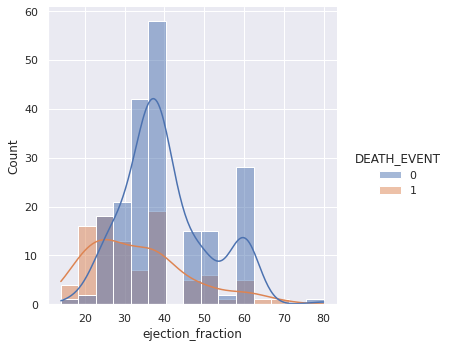

In [163]:
sns.displot(data=df_heart_failure, 
            x="ejection_fraction",
            kde=True, hue = 'DEATH_EVENT') 

## Looking For Bivariate Relations <a id="bivariate"></a>

#### Age and Gender Effect on Death Event <a id="uniplot"></a>

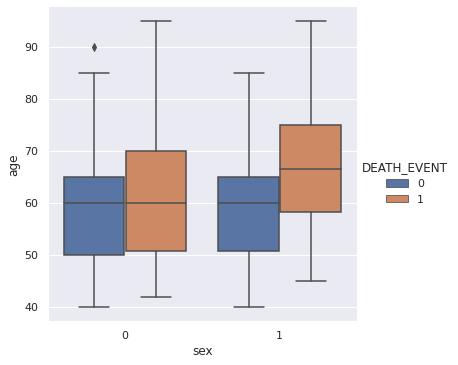

In [160]:
sns.catplot(data=df_heart_failure, kind="box", x="sex", y="age", hue="DEATH_EVENT")

* Death event occurs more within male(1) at the age of around 70's while female is 60's. 

#### Age and Diabetes Effect on Death Event <a id="uniplot"></a>

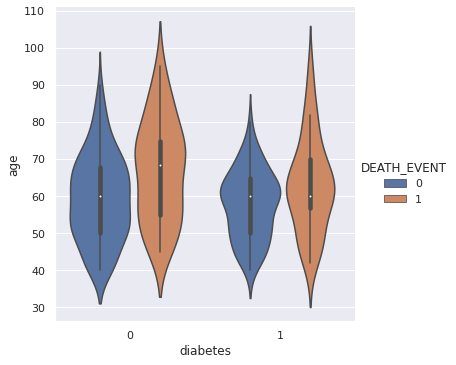

In [162]:
sns.catplot(data=df_heart_failure, kind="violin", x="diabetes", y="age", hue="DEATH_EVENT")

#### Smoking and Age Effect on Death Event <a id="uniplot"></a>

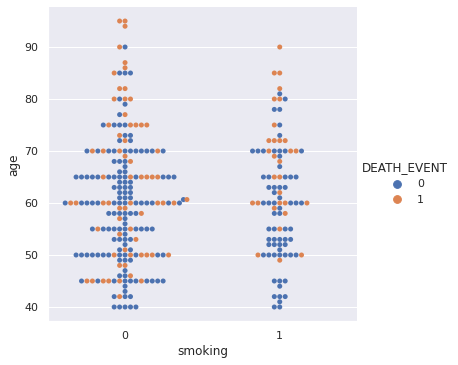

In [169]:
sns.catplot(data=df_heart_failure, kind="swarm", x="smoking", y="age", hue="DEATH_EVENT")

<AxesSubplot:xlabel='agegrp', ylabel='serum_sodium'>

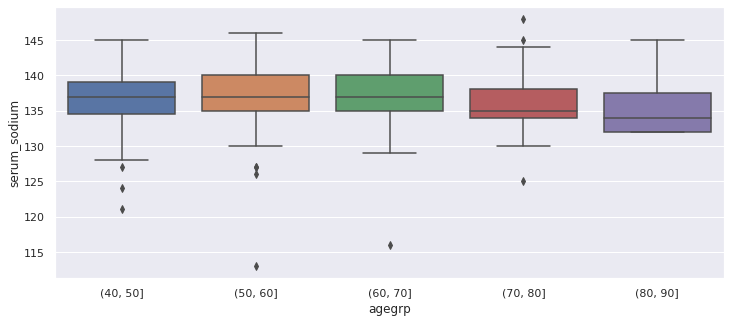

In [119]:
#different age groups
df_heart_failure["agegrp"]=pd.cut(df_heart_failure.age, [40,50,60,70,80,90])
plt.figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "serum_sodium", data=df_heart_failure)

## Looking for Multivariate Relations <a id="multivariate"></a>

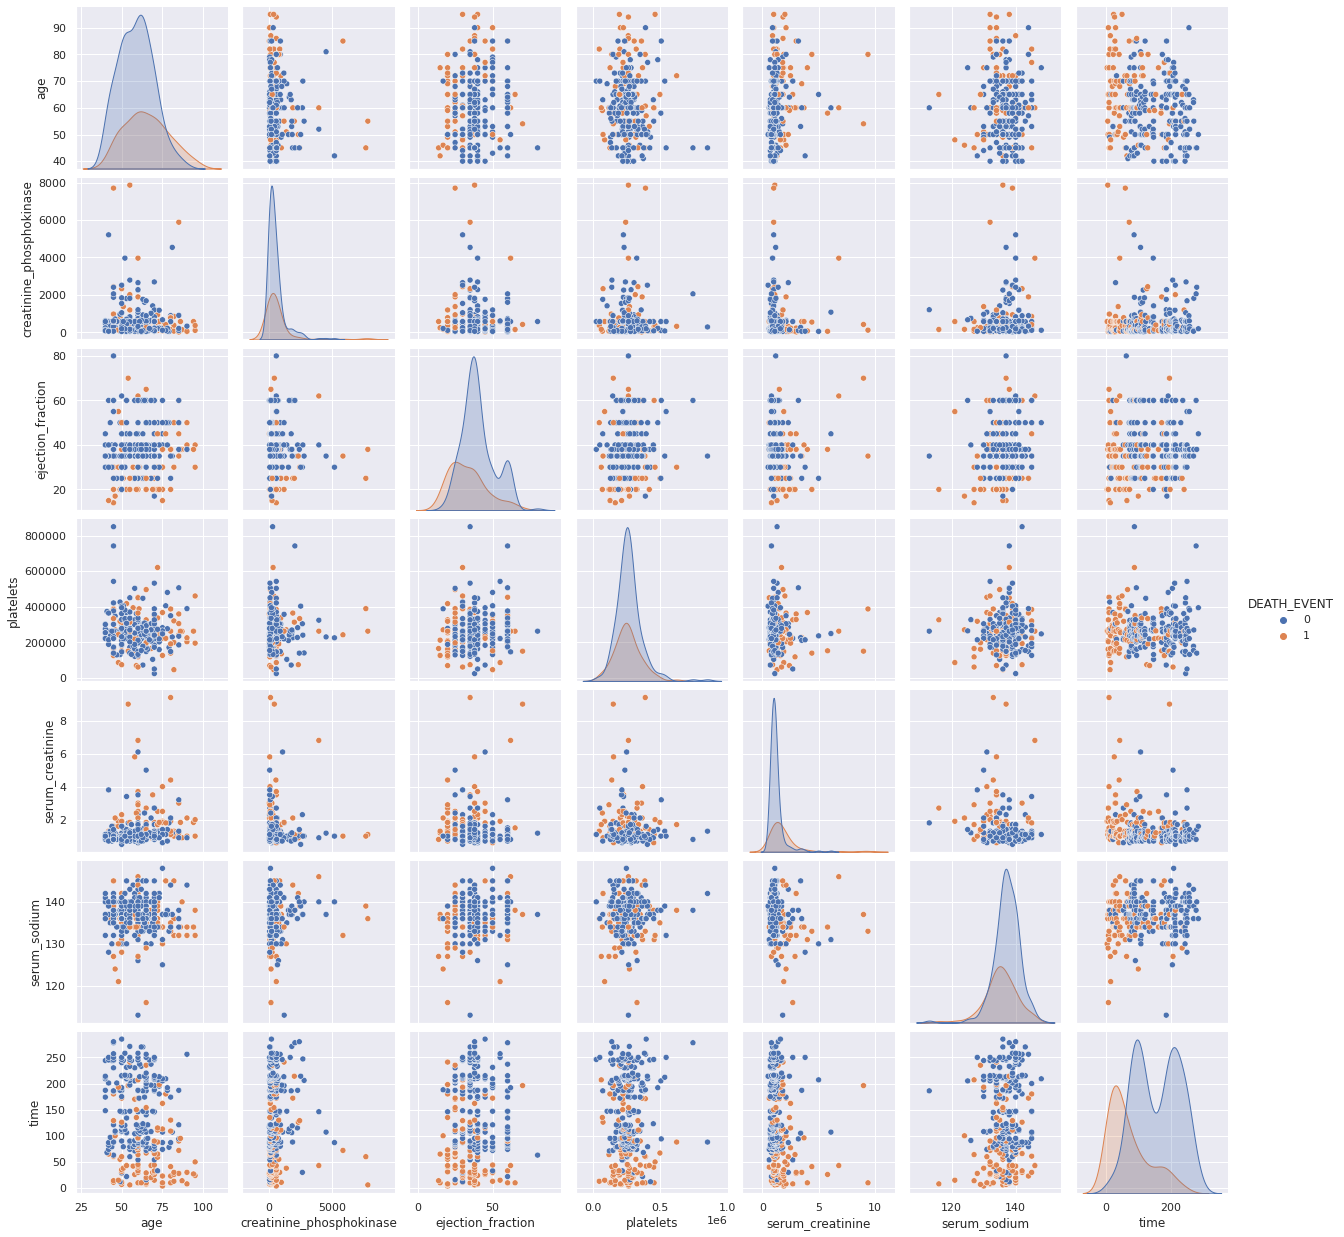

In [173]:
# Joint and marginal distributions for all pairwise relationships and for each numeric variable
df_death_event = df_heart_failure[['DEATH_EVENT']]
df_merg = pd.concat([df_numericals,df_death_event], axis=1)
sns.pairplot(data=df_merg, hue="DEATH_EVENT") 

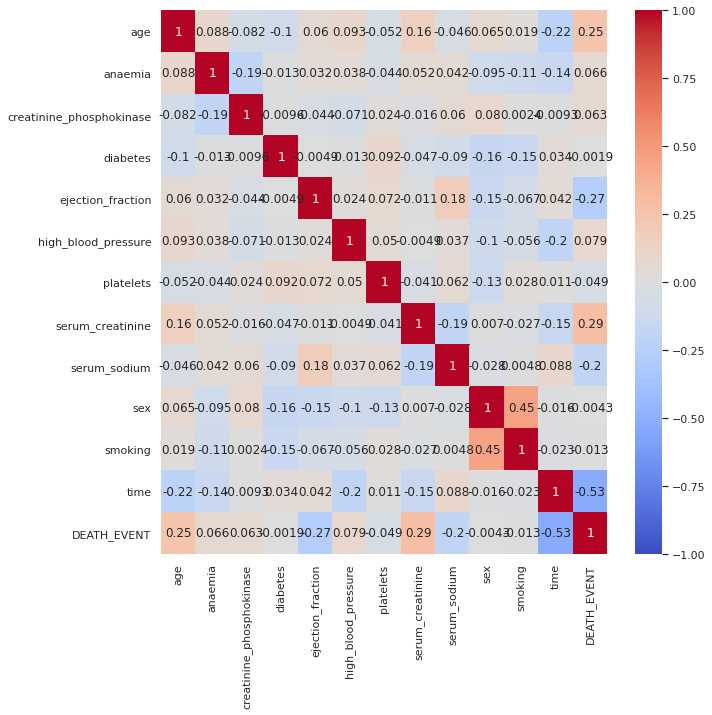

In [148]:
plt.figure(figsize=(10,10))
sns.heatmap(df_heart_failure.corr(), vmin=-1, cmap='coolwarm', annot=True);

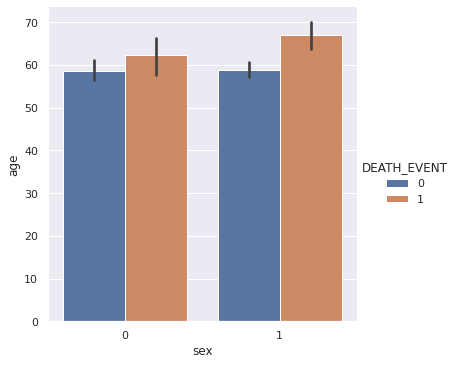

In [176]:
sns.catplot(x="sex", y="age", hue="DEATH_EVENT", kind="bar", data=df_heart_failure)

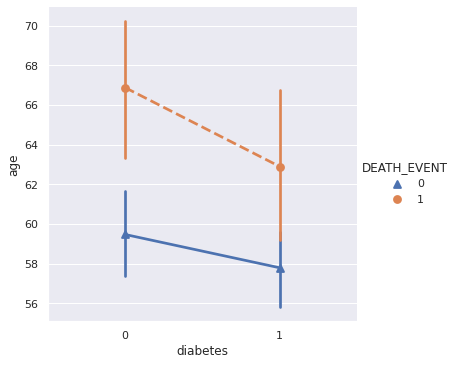

In [180]:
sns.catplot(x="diabetes", y="age", hue="DEATH_EVENT",
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df_heart_failure)

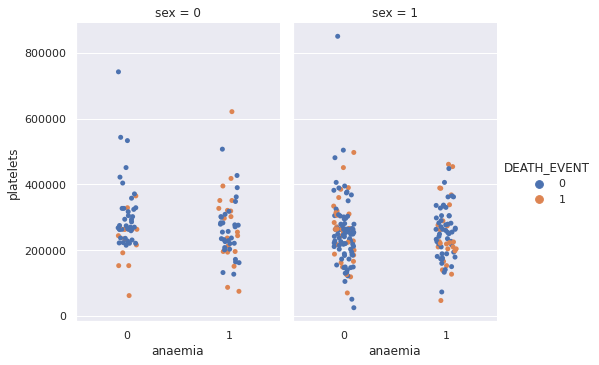

In [183]:
sns.catplot(x="anaemia", y="platelets", hue="DEATH_EVENT",
            col="sex", aspect=.7,
            kind="strip", data=df_heart_failure)


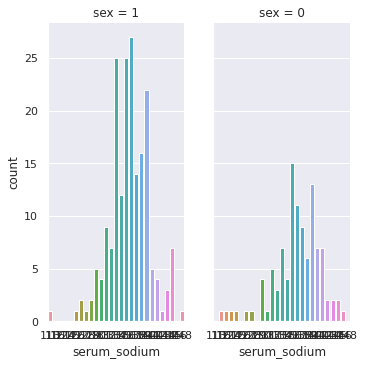

In [188]:
order = df_categoricals['sex'].value_counts().index # order the columns from highest count to lowest.
sns.catplot(x="serum_sodium",
            col='sex',
            col_order=order,
            kind="count", data=df_heart_failure,
            aspect=0.5)

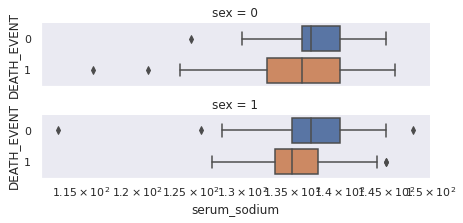

In [186]:
g =sns.catplot(x="serum_sodium", y="DEATH_EVENT", row="sex",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df_heart_failure.query("serum_sodium > 0"))
g.set(xscale="log")

## Interactive Plots <a class="anchor" id="interactive"></a>